# Assignment 3 - Model Interpretability

Name - Shweta Chandraprakash Bulchandani

NUID - 002769540

# Abstarct

The goal was to construct a realistic model to precisely predict the next meningitis disease outbreak in Nigeria. It is generally believed that it’s impossible to precisely predict the next meningitis disease as it depends on various factors. For this dataset age and report year is the dependent variable and others are independent variables. First, major factors affecting the diseases should be selected. Then, a model for disease prediction should be established from linear regression. That should be applied to the Meningitis dataset to test the model. Through the data analysis and test it can be summarized that the linear regression model can effectively predict and analyze the housing price to some extent, while the algorithm can still be improved through more advanced machine learning methods.

# Information about the Dataset

What is our ultimate aim with this notebook?

Our ultimate aim is to build a machine learning model that can predict if the person will be afflicted with meningitis disease based on certain parameters. Before we create a model we need to do some data cleaning, feature selection and exploratory data analysis of the kaggle dataset.

**Kaggle Dataset Link**: https://www.kaggle.com/datasets/eiodelami/disease-outbreaks-in-nigeria-datasets

# Installing Dependencies 

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=7c098be2e7c527d92cec696e3375895de38a992eb953053d6a6342642830a294
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


# Importing Required Libraries 

In [3]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn import tree
from sklearn import linear_model
from sklearn import ensemble
import statsmodels.api as sd
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
import random

import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

# importing shap
!pip install shap
import shap 

import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 11.9 MB/s eta 0:00:00


# Reading and Studying the data

In [4]:
#Loading the CSV File
df_train=pd.read_csv("https://raw.githubusercontent.com/ShwetaBulchandani/DataScienceEngineeringMethods_002769540/main/meningitis_dataset.csv")


In [5]:
df_train.head()

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,...,0,0,1,Alive,1,0,Confirmed,1,0,1


In [6]:
#Dropping the unnecessary features 
df_train=df_train.drop(['surname', 'firstname', 'gender','state','settlement','disease','age_str','health_status', 'id','middlename', 'serotype','report_outcome', 'report_date', 'report_year', 'date_of_birth'], axis=1)


In [7]:
#Defining the Response and the Predictors
y_total=df_train['cholera']
df_train=df_train.drop(['cholera'],axis=1)

#Storing Numerical and Categorical columns seperately for use later on
num_cols=list(df_train._get_numeric_data().columns)
cat_cols=list(set(df_train.columns)-set(num_cols))
df_train.head()

,gender_male,gender_female,rural_settlement,urban_settlement,age,child_group,adult_group,diarrhoea,measles,viral_haemmorrhaphic_fever,...,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype
0,0,1,1,0,32,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,32,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,1
2,0,1,0,1,24,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,1
3,0,1,1,0,63,0,1,0,1,0,...,0,0,0,0,1,1,0,1,0,1
4,1,0,0,1,9,1,0,0,0,0,...,1,0,0,0,1,1,0,1,0,1


In [8]:
#Encoding the categorical variables
mapping_dict={}
for col in cat_cols:
    mapping_dict[col]={k: i for i, k in enumerate(df_train[col].unique())}
    df_train[col] = df_train[col].map(mapping_dict[col])

In [9]:
df_train.head()

,gender_male,gender_female,rural_settlement,urban_settlement,age,child_group,adult_group,diarrhoea,measles,viral_haemmorrhaphic_fever,...,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype
0,0,1,1,0,32,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,32,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,1
2,0,1,0,1,24,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,1
3,0,1,1,0,63,0,1,0,1,0,...,0,0,0,0,1,1,0,1,0,1
4,1,0,0,1,9,1,0,0,0,0,...,1,0,0,0,1,1,0,1,0,1


In [10]:
# Normalizing our data for proper analysis

# list of numerical columns which require normalization
num_cols=['age']

# Importing required library from sklearn for normalization
from sklearn import preprocessing
feature_to_scale = num_cols

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
df_train[feature_to_scale] = min_max_scaler.fit_transform(df_train[feature_to_scale])

df_train.head()

,gender_male,gender_female,rural_settlement,urban_settlement,age,child_group,adult_group,diarrhoea,measles,viral_haemmorrhaphic_fever,...,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype
0,0,1,1,0,0.410256,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,0.410256,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,1
2,0,1,0,1,0.307692,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,1
3,0,1,1,0,0.807692,0,1,0,1,0,...,0,0,0,0,1,1,0,1,0,1
4,1,0,0,1,0.115385,1,0,0,0,0,...,1,0,0,0,1,1,0,1,0,1


In [13]:
df_train.shape

(284484, 24)

In [14]:
#taking the basic information of all the columns in the given dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   gender_male                 284484 non-null  int64  
 1   gender_female               284484 non-null  int64  
 2   rural_settlement            284484 non-null  int64  
 3   urban_settlement            284484 non-null  int64  
 4   age                         284484 non-null  float64
 5   child_group                 284484 non-null  int64  
 6   adult_group                 284484 non-null  int64  
 7   diarrhoea                   284484 non-null  int64  
 8   measles                     284484 non-null  int64  
 9   viral_haemmorrhaphic_fever  284484 non-null  int64  
 10  meningitis                  284484 non-null  int64  
 11  ebola                       284484 non-null  int64  
 12  marburg_virus               284484 non-null  int64  
 13  yellow_fever  

In [11]:
# Checking for any null values in the dataset, as we hav no null values - we are good to go.
df_train.isnull().sum()  

gender_male                   0
gender_female                 0
rural_settlement              0
urban_settlement              0
age                           0
child_group                   0
adult_group                   0
diarrhoea                     0
measles                       0
viral_haemmorrhaphic_fever    0
meningitis                    0
ebola                         0
marburg_virus                 0
yellow_fever                  0
rubella_mars                  0
malaria                       0
NmA                           0
NmC                           0
NmW                           0
alive                         0
dead                          0
unconfirmed                   0
confirmed                     0
null_serotype                 0
dtype: int64

In [12]:
df_train.describe()  # Statistical description of our dataset

,gender_male,gender_female,rural_settlement,urban_settlement,age,child_group,adult_group,diarrhoea,measles,viral_haemmorrhaphic_fever,...,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype
count,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,...,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000
mean,0.482319,0.517681,0.501128,0.498872,0.445287,0.291707,0.708293,0.100357,0.100079,0.099833,...,0.100318,0.100304,0.024740,0.025063,0.950194,0.499835,0.500165,0.749691,0.250309,0.900304
std,0.499688,0.499688,0.500000,0.500000,0.285140,0.454549,0.454549,0.300476,0.300106,0.299778,...,0.300425,0.300406,0.155331,0.156317,0.217544,0.500001,0.500001,0.433192,0.433192,0.299595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.179487,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,0.435897,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.692308,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This table shows summary statistics for a dataset with 284484 observations and 24 variables.

The variables are: gender_male, gender_female, rural_settlement, urban_settlement, age, child_group, adult_group, disease, diarrhoea, measles, viral_haemmorrhaphic_fever, meningitis, ebola, marburg_virus, yellow_fever, rubella_mars, malaria, NmA, NmC, NmW, alive and dead

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

Text(0.5, 1.0, 'Variable Correlation')

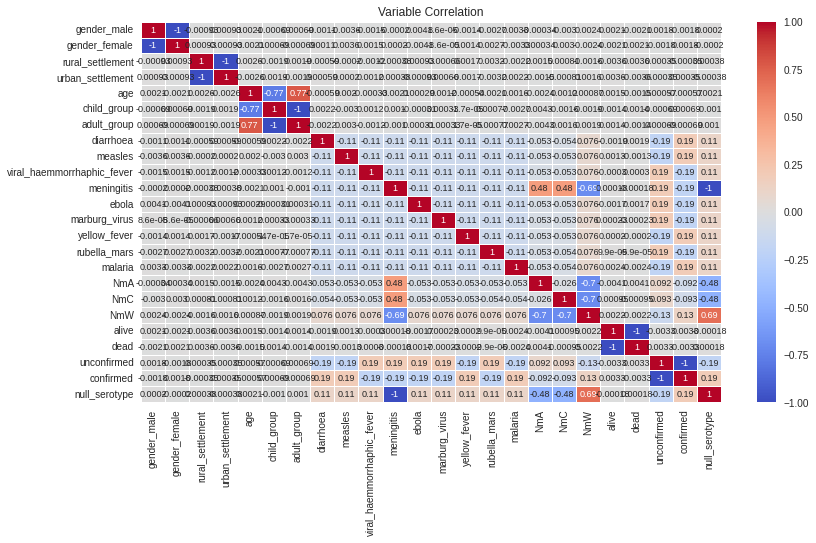

In [16]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(13,7))

sns.heatmap(df_train.corr(),center=0, linewidths=0.9,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# <b>1. <u>Fitting a linear model and interpreting the coefficients</u></b>

In [17]:
import statsmodels.api as sd
train_X, val_X, train_y, val_y = train_test_split(df_train, y_total, random_state=1)
log_reg = sd.Logit(train_y,train_X).fit()
print(log_reg.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                cholera   No. Observations:               213363
Model:                          Logit   Df Residuals:                   213344
Method:                           MLE   Df Model:                           18
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        20:43:07   Log-Likelihood:            -0.00030679
converged:                      False   LL-Null:                       -69579.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
gender_male                    2.6087   1.12e+12   2.33e-12      1.000   -2.19e+12    2.19e+12
gender_female    

### Observations of Coefficients

1. From the table we can clearly see that the p value of most of the features are 1.00
(P = 1.00 means is that if the null hypothesis is true and if we perform the study in an identical manner a large number of times, then on 100% of occasions we will obtain a difference between groups of 0% or greater)
2. Features such as Age has p value more tha 5% and hence they are important feature.
3. Though we can see that the p-values are different for all our features, we can't actually rank them at this point. What we can do next? - Run Shap Analysis

In [22]:
#Computing Linear Regression model for Meningitis dataset
def linear_reg(X_train,y_train,val_X,val_y):
    linear_reg = LinearRegression()
    linear_reg_model = linear_reg.fit(train_X,train_y)
    print('Train set')
    pred=linear_reg_model.predict(train_X)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(train_y,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(train_y,pred)))
    print('Test set')
    pred=linear_reg_model.predict(val_X)
    model_lr=linear_reg_model.predict(val_X)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(val_y,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(val_y,pred))) 

In [23]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [25]:
cols1= ['gender_male', 'gender_female', 'rural_settlement' , 'urban_settlement' , 'age','child_group', 'adult_group', 'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis', 'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria', 'NmA', 'NmC', 'NmW', 'alive', 'dead', 'unconfirmed', 'confirmed', 'null_serotype'  ]

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#Computing R2 for testing and training data
linear_reg(train_X[cols1],train_y,val_X[cols1],val_y)

Train set
Linear Regression Mean Squared error :4.845225855103805e-31
Linear Regression r2_score :1.0
Test set
Linear Regression Mean Squared error :4.826252354012502e-31
Linear Regression r2_score :1.0


### <b>Shap values for Logistic regression</b>

SHAP values for each feature represent the change in the expected model prediction when conditioning on that feature. For each feature, SHAP value explains the contribution to explain the difference between the average model prediction and the actual prediction of the instance.The essence of Shapley value is to measure the contributions to the final outcome from each player separately among the coalition, while preserving the sum of contributions being equal to the final outcome.SHAP values in model explanation can measure the input features contribution to individual predictions.

In [28]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = train_X.sample(frac=0.01,random_state=200)
clf_model = LogisticRegression(random_state=0).fit(train_X, train_y)
#LinearExplainer is used as linear regression model is used
explainer = shap.LinearExplainer(clf_model, train_X, feature_perturbation="interventional")
shap_values = explainer.shap_values(val_X) #Saving SHAP values

### Shap Analysis for a single point

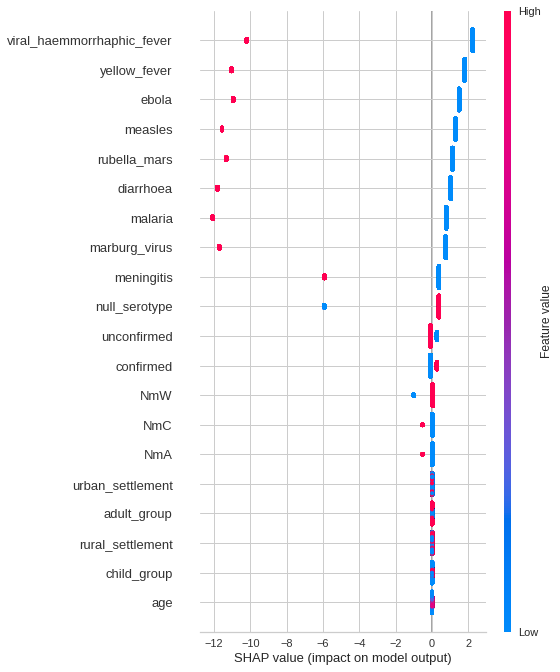

In [29]:
shap.summary_plot(shap_values, val_X, feature_names=list(train_X.columns))

Observations from the Shap summmary

1. People who have yellow_fever, ebola, measles and malaria seem to more readily to contract Cholera
2. People who NmA, NmC, NmA have significantly less chances of contracting Cholera.

In [30]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[17],feature_names=list(train_X.columns))
#shap.force_plot(explainer.expected_value, shap_values, val_X.iloc[1], feature_names=list(train_X.columns))

### Observations
- Diarrhoea is the most important feature for predicting the probability that a person will have cholera or not
- Malaria, Rubella_Mars, Measles, Ebola, Yellow_Fever and Viral_Haemmorrhaphic_Fever seem to push the value away from base_value
- Diarrhoea are the features which push the value towards the base value

In [31]:
#Initialize java script
shap.initjs()

 #Explain one row in the data with the
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [33]:
#Initializing explainer from shap, lm is our trained model
explainer_shap=shap.LinearExplainer(model=model, masker=train_X)

#Computing shap values for train dataset
shap_values = explainer_shap.shap_values(train_X)

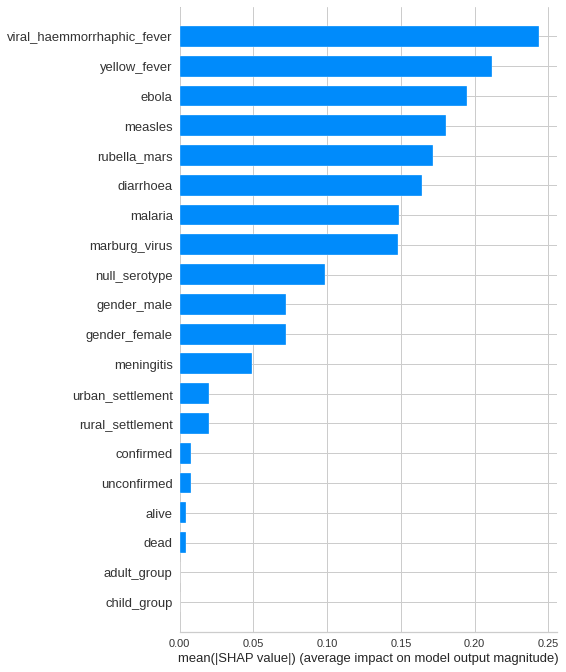

In [34]:
shap.summary_plot(shap_values, X, plot_type="bar")

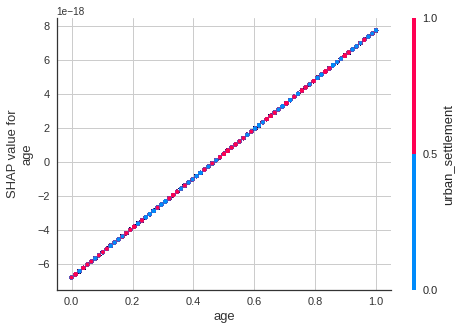

In [36]:
shap.dependence_plot("age", shap_values, train_X)

In [37]:
from sklearn.linear_model import LinearRegression
import shap

# train Linear model
#Seperating the dependent and independent variable from the main dataset
X=df_train.drop(['malaria'],axis=1)
y=df_train['malaria']
regressor = LinearRegression()
linear_reg = regressor.fit(X, y)

# compute SHAP values
explainer = shap.Explainer(linear_reg, X)
shap_values = explainer(X)

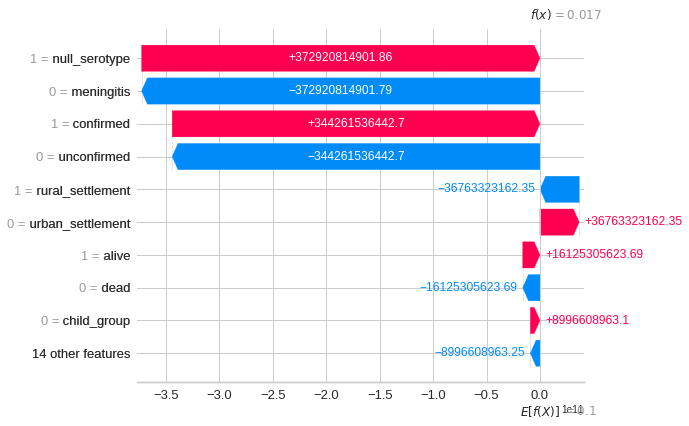

In [38]:
shap.plots.waterfall(shap_values[0])

For the linear regression model from the plots it can be interpreted that null_serotype, meningitis, confirmed and unconfirmed are the important features for this regressor model. These are the major features in determining the cholera disease.

# <b> 2. <u>Fitting a tree based model and Interpreting the coefficients</u></b>

In [39]:
my_model = DecisionTreeClassifier(random_state=42).fit(train_X, train_y)

### Feature importance of Decision Tree model

<BarContainer object of 24 artists>

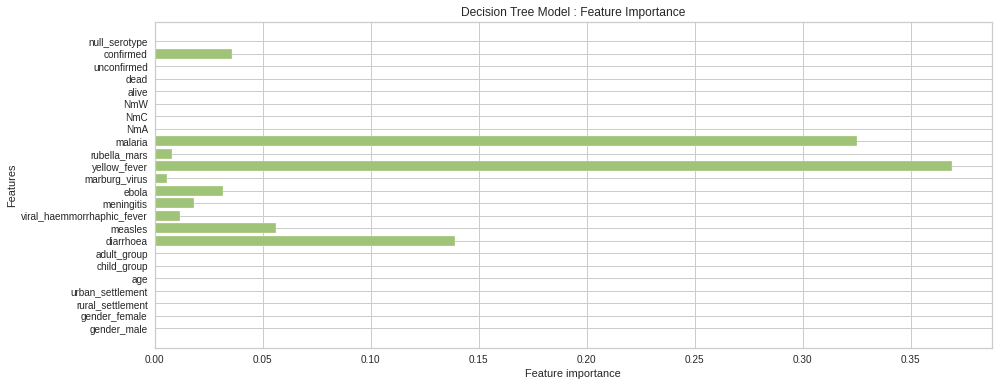

In [40]:
plt.figure(figsize=(15,6))
importances = my_model.feature_importances_
features = list(train_X.columns)
plt.title("Decision Tree Model : Feature Importance")
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.barh(features,importances,color='g')

### Observations
1. It is clear from the above plot that Yellow Fever is the most important feature for predicting the decision of buying a travel insurance
2. Features such as Malaria and Diarrhoea are also some other important features

## Plotting the Decision Tree

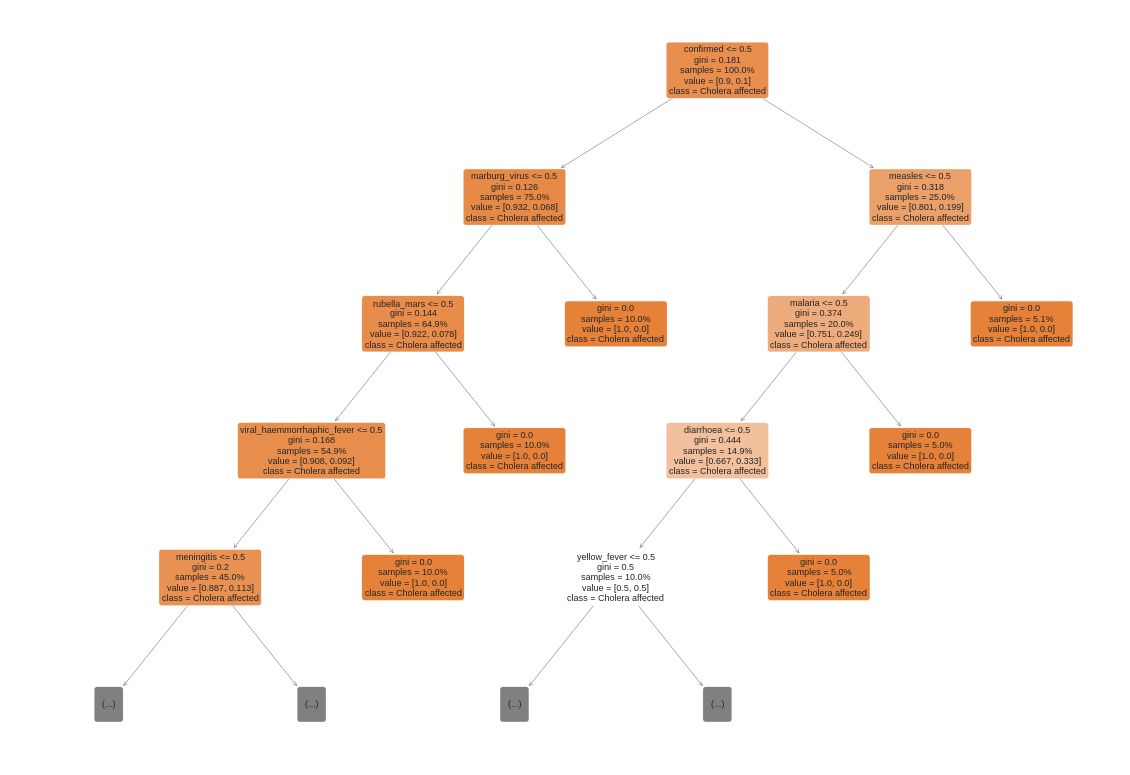

In [41]:
fig = plt.figure(figsize=(20, 14))
vis = tree.plot_tree(my_model, feature_names = features, class_names = ['Cholera affected', 'Cholera Not affected'], max_depth=4, fontsize=9, proportion=True, filled=True, rounded=True)

### Observations
1. It is clear from the decision tree chart is that Measles is the first node which is causing splitting of samples
2. Rest of the nodes in subsequest levels are important as their appearance

### Shap Analysis for a single point

In [42]:
row_to_show = 17
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [43]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction,feature_names=list(val_X.columns))

### Observations
1. Diarrhoea is the most important feature for predicting the probability that a person will have cholera or not

2. Malaria, Ebola, Measles, Confirmed and Yellow_Fever seem to push the value away from base_value

3. Diarrhoea variable is pushing the value towards the base value



# <b> 3. <u>Using an AutoML Models and Interpretability</u></b>

In [44]:
#defining the environment variables of h2o
import psutil
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import logging
import optparse
import time
import json
min_mem_size=6 
run_time=60
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

5
Checking whether there is an H2O instance running at http://localhost:8676..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpf5vr3h9b
  JVM stdout: /tmp/tmpf5vr3h9b/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpf5vr3h9b/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:8676
Connecting to H2O server at http://127.0.0.1:8676 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_v6kcdt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [45]:
#function for coverting binary to yes/no

def convert_binary_to_yesno(x):
    if x == 1:
        return "Yes"
    else:
        return "No"

In [47]:
df_h = h2o.import_file("https://raw.githubusercontent.com/ShwetaBulchandani/DataScienceEngineeringMethods_002769540/main/meningitis_dataset.csv")
df_h = df_h.drop(['cholera'],axis=1)

df_h.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,age_str,date_of_birth,child_group,adult_group,disease,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,serotype,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,0,2018-05-15 00:00:00,2018,32,32 years,1986-01-17 00:00:00,0,1,Cholera,0,0,0,0,0,0,0,0,0,null serotype,0,0,0,alive,1,0,confirmed,0,1,1
2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,0,2017-02-28 00:00:00,2017,32,32 years,1985-09-01 00:00:00,0,1,Marburg Virus,0,0,0,0,0,1,0,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,1,2012-03-02 00:00:00,2012,24,24 years,1988-05-01 00:00:00,0,1,Marburg Virus,0,0,0,0,0,1,0,0,0,Null,0,0,1,Dead,0,1,Not Confirmed,1,0,1
4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,0,2010-05-21 00:00:00,2010,63,63 years,1947-05-24 00:00:00,0,1,Measles,0,1,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1
5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,1,2017-08-28 00:00:00,2017,9,9 years,2008-01-07 00:00:00,1,0,Rubella Mars,0,0,0,0,0,0,0,1,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
6,Yakubu,Janet,Chioma,Female,0,1,Kaduna,Rural,1,0,2012-06-27 00:00:00,2012,44,44 years,1968-06-06 00:00:00,0,1,Ebola,0,0,0,0,1,0,0,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
7,Razak,Adaugo,Adaobi,Female,0,1,Taraba,Rural,1,0,2010-04-01 00:00:00,2010,61,61 years,1949-07-19 00:00:00,0,1,Yellow Fever,0,0,0,0,0,0,1,0,0,Null,0,0,1,Alive,1,0,Confirmed,0,1,1
8,Annakyi,Danmbazzu,Osagie,Male,1,0,Katsina,Rural,1,0,2015-10-04 00:00:00,2015,2,2 months,2014-12-18 00:00:00,1,0,Diarrhoea,1,0,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1
9,Adejoro,Iyin,Osatimehin,Male,1,0,Katsina,Rural,1,0,2011-11-14 00:00:00,2011,54,54 years,1957-08-05 00:00:00,0,1,Rubella Mars,0,0,0,0,0,0,0,1,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
10,Okorie,Adaugo,Chika,Female,0,1,Osun,Urban,0,1,2014-06-17 00:00:00,2014,15,15 years,1999-10-19 00:00:00,1,0,Marburg Virus,0,0,0,0,0,1,0,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1


In [49]:
pct_rows=0.80
df_train, df_test = df_h.split_frame([pct_rows])
print('Train dataframe size')
print(df_train.shape)
print('Test dataframe size')
print(df_test.shape)
#defining the predictor and response variable for our model
X=df_h.columns
y ='gender'
# df_h['Cholera'] = df_h['Cholera'].apply(convert_binary_to_yesno) 
X.remove(y)
print('The predictor variables are as follows')
print(X)
print('The response variable is')
print(y)

Train dataframe size
(227623, 39)
Test dataframe size
(56861, 39)
The predictor variables are as follows
['id', 'surname', 'firstname', 'middlename', 'gender_male', 'gender_female', 'state', 'settlement', 'rural_settlement', 'urban_settlement', 'report_date', 'report_year', 'age', 'age_str', 'date_of_birth', 'child_group', 'adult_group', 'disease', 'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis', 'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria', 'serotype', 'NmA', 'NmC', 'NmW', 'health_status', 'alive', 'dead', 'report_outcome', 'unconfirmed', 'confirmed', 'null_serotype']
The response variable is
gender


In [51]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
# Passing the training and testing dataset through H20 AutomML
aml.train(x=X,y=y,training_frame=df_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_2_20230324_213715


Model Summary: 
    number_of_trees
--  -----------------
    55

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 3.1630285446620655e-08
RMSE: 0.00017784905241979967
LogLoss: 0.00017193623316508292
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9997105002403259
        Female    Male    Error    Rate
------  --------  ------  -------  --------------
Female  82710     0       0        (0.0/82710.0)
Male    0         76599   0        (0.0/76599.0)
Total   82710     76599   0        (0.0/159309.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.999711     1         7
max f2                       0.999711     1         7
max f0point5                 0.999711     1         7
max accuracy                 0.999711     1         7
max precision                0.999843     1         0
max recall                   0.999711     1         7
max specificity              0.999843     1         0
max absolute_mcc             0.999711     1         7
max min_per_class_accuracy   0.999711     1         7
max mean_per_class_accuracy  0.999711     1         7
max tns                      0.999843     82710     0
max fns                      0.999843     13264     0
max fps                      0.000146925  82710     16
max tps                      0.999711     76599     7
max tnr                      0.999843     1         0
max fnr                      0.999843     0.173162  0
max fpr                      0.000146925  1         16
max tpr                      0.999711     1         7

Gains/Lift Table: Avg response rate: 48.08 %, avg score: 48.08 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.397561                    0.999843           2.07978  2.07978            1                0.999843     1                           0.999843            0.826838        0.826838                   107.978  107.978            0.826838
2        0.401484                    0.99979            2.07978  2.07978            1                0.999818     1                           0.999842            0.00815938      0.834998                   107.978  107.978            0.834998
3        0.510731                    0.000263503        1.51036  1.95798            0.726212         0.726077     0.941436                    0.941283            0.165002        1                          51.0361  95.7979            0.942389
4        0.784444                    0.000146928        0        1.27479            0                0.000169483  0.612944                    0.612904            0               1                          -100     27.4788            0.415186
5        1                           0.000146925        0        1                  0                0.000146925  0.48082                     0.48082             0               1                          -100     0                  0

ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 3.1575666339168255e-08
RMSE: 0.00017769543139644378
LogLoss: 0.00017181373992963546
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9997105002403259
        Female    Male    Error    Rate
------  --------  ------  -------  -------------
Female  1

In [52]:
print(aml.leaderboard)

model_id                                                   auc      logloss    aucpr    mean_per_class_error         rmse          mse
XGBoost_1_AutoML_2_20230324_213715                           1  0.000171814        1                       0  0.000177695  3.15757e-08
GLM_1_AutoML_2_20230324_213715                               1  0.210343           1                       0  0.189803     0.0360252
GBM_1_AutoML_2_20230324_213715                               1  6.76373e-06        1                       0  6.77709e-06  4.5929e-11
StackedEnsemble_BestOfFamily_1_AutoML_2_20230324_213715      1  8.19137e-05        1                       0  8.20727e-05  6.73592e-09
[4 rows x 7 columns]



In [53]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'XGBoost_1_AutoML_2_20230324_213715': 0, 'GLM_1_AutoML_2_20230324_213715': 1}

In [54]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [55]:
#Printing the best model
print("The best model is - " , best_model.algo)

The best model is -  xgboost


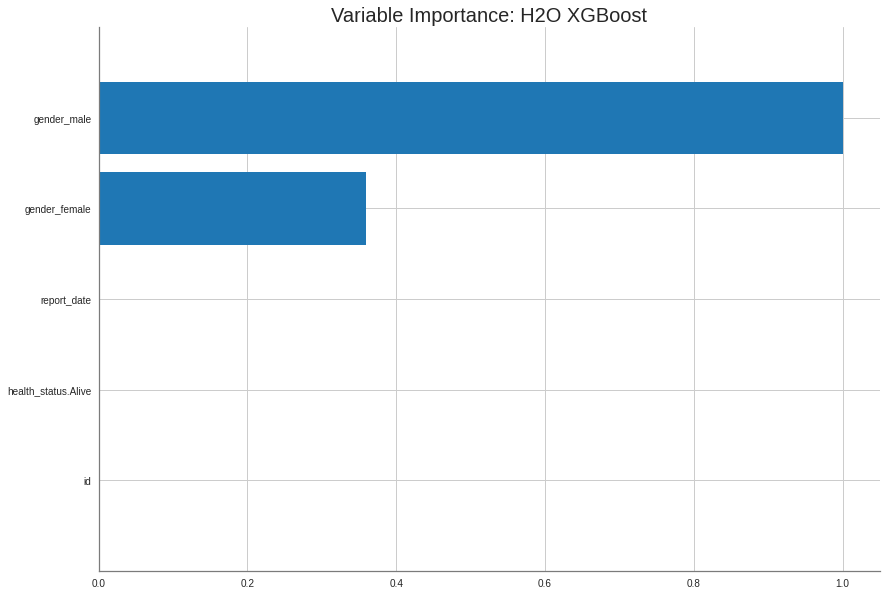

<Figure size 576x396 with 0 Axes>

In [56]:
#plot variables in order of their importance for price prediction
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

1
glm


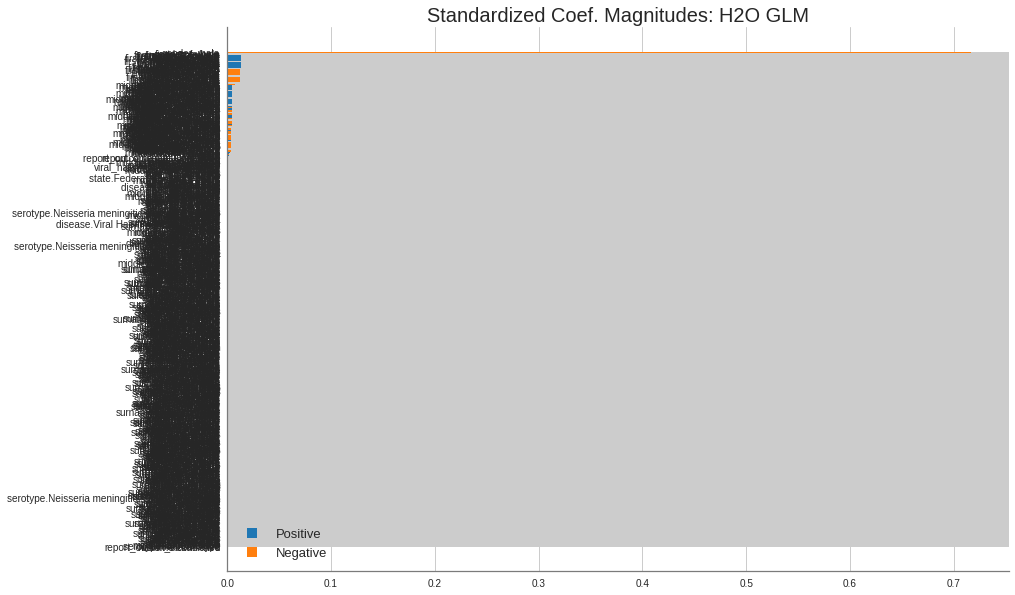

In [57]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

**SHAP Analysis on AutoML Model**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_1_AutoML_2_20230324_213715,1,0.000171693,1,0,0.00017755,3.15239e-08,14956,0.003299,XGBoost
GLM_1_AutoML_2_20230324_213715,1,0.210426,1,0,0.189871,0.0360509,18215,0.004283,GLM
GBM_1_AutoML_2_20230324_213715,1,6.76309e-06,1,0,6.77638e-06,4.59193e-11,18972,0.020512,GBM
StackedEnsemble_BestOfFamily_1_AutoML_2_20230324_213715,1,8.1896e-05,1,0,8.20541e-05,6.73287e-09,7577,0.018743,StackedEnsemble


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_2_20230324_213715

,Female,Male,Error,Rate
Female,29311.0,0.0,0.0,(0.0/29311.0)
Male,0.0,27550.0,0.0,(0.0/27550.0)
Total,29311.0,27550.0,0.0,(0.0/56861.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

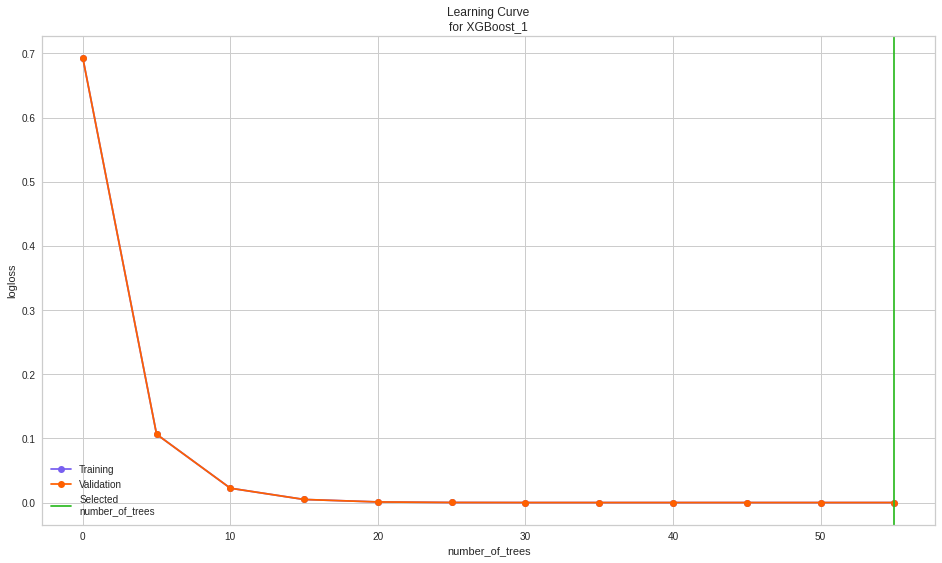

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

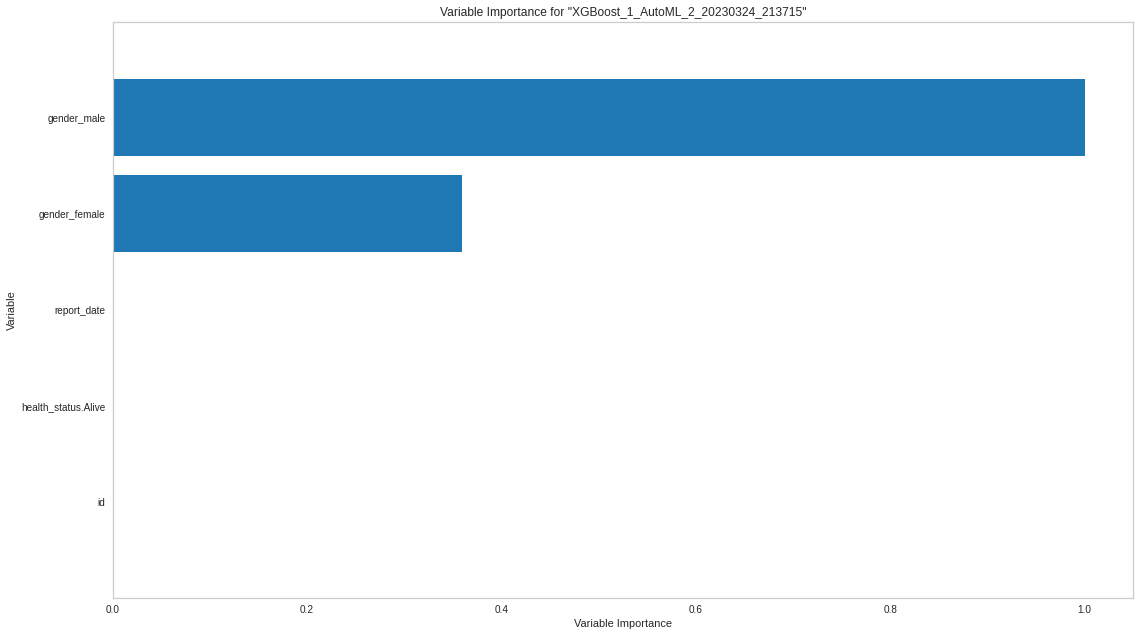

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

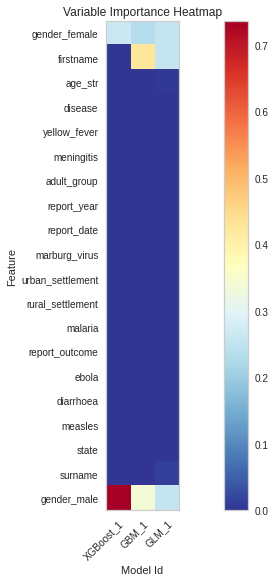

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

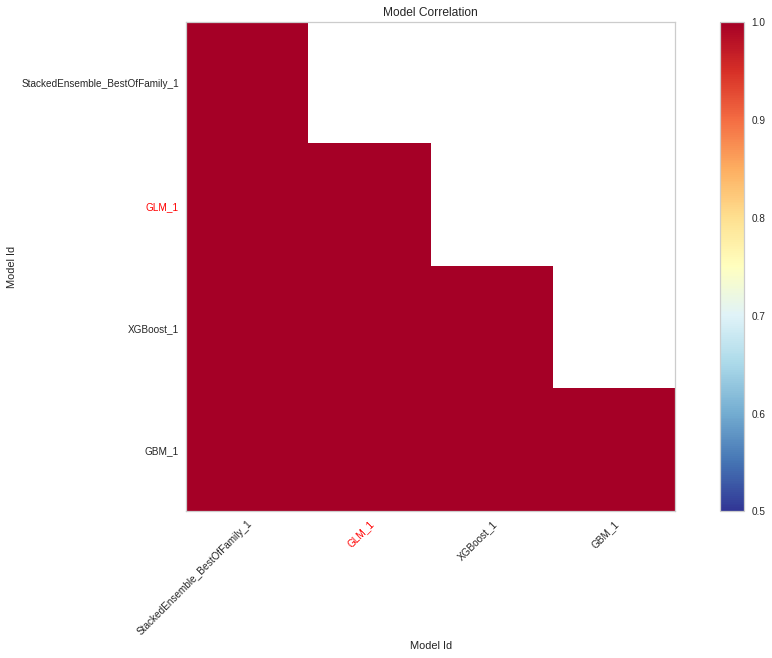

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

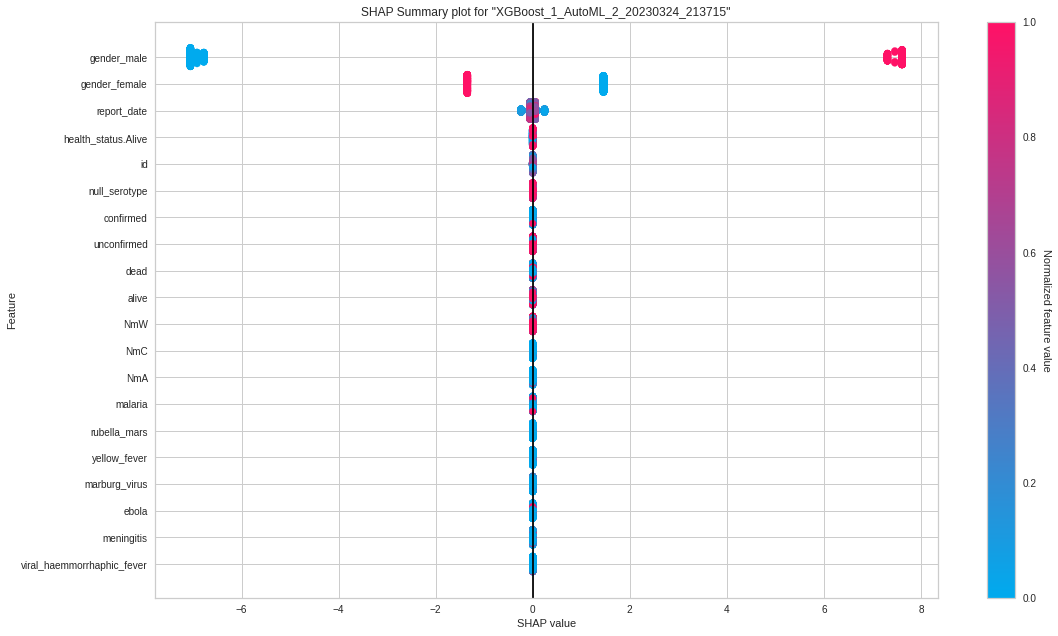

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

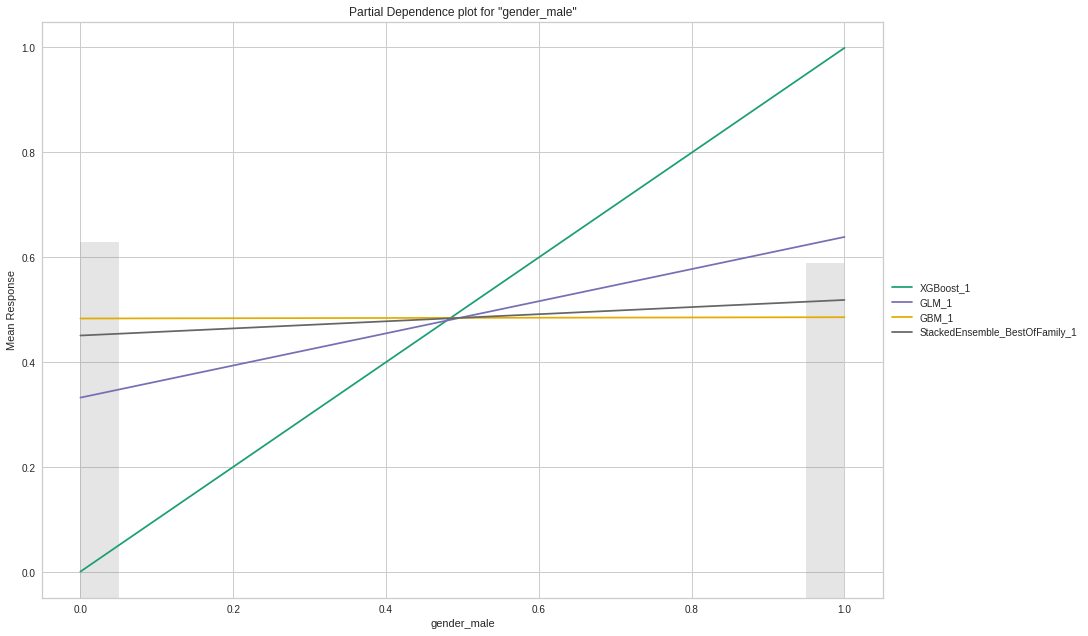

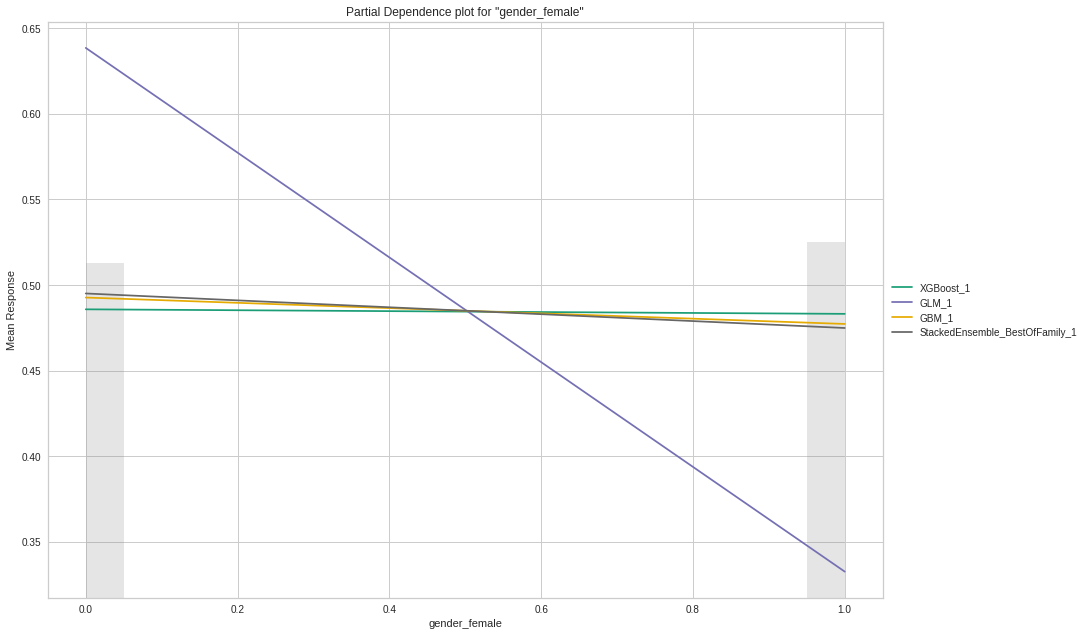

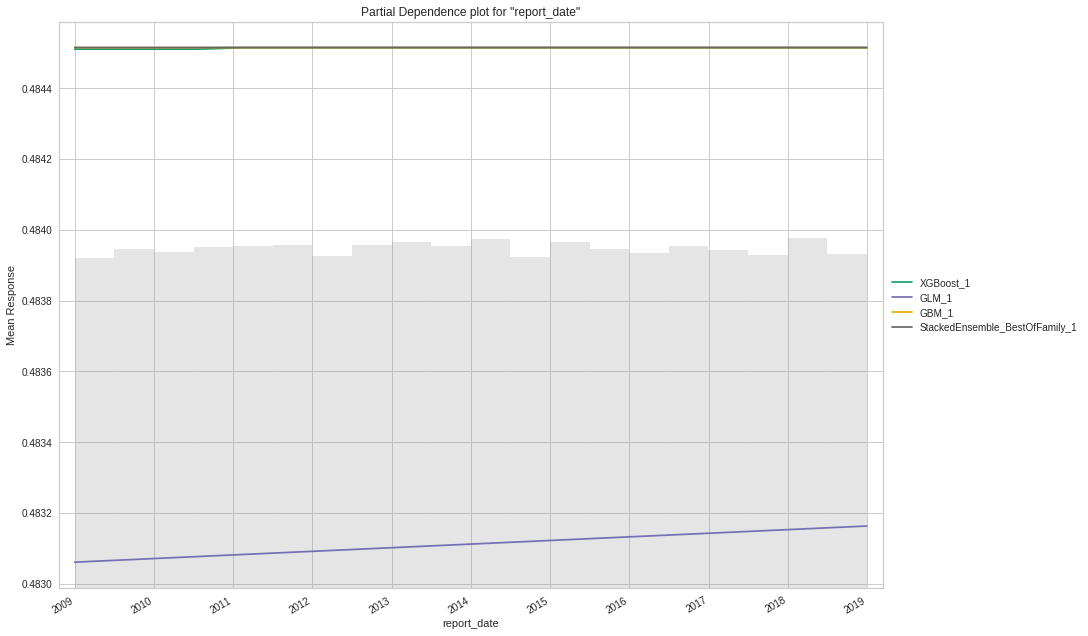

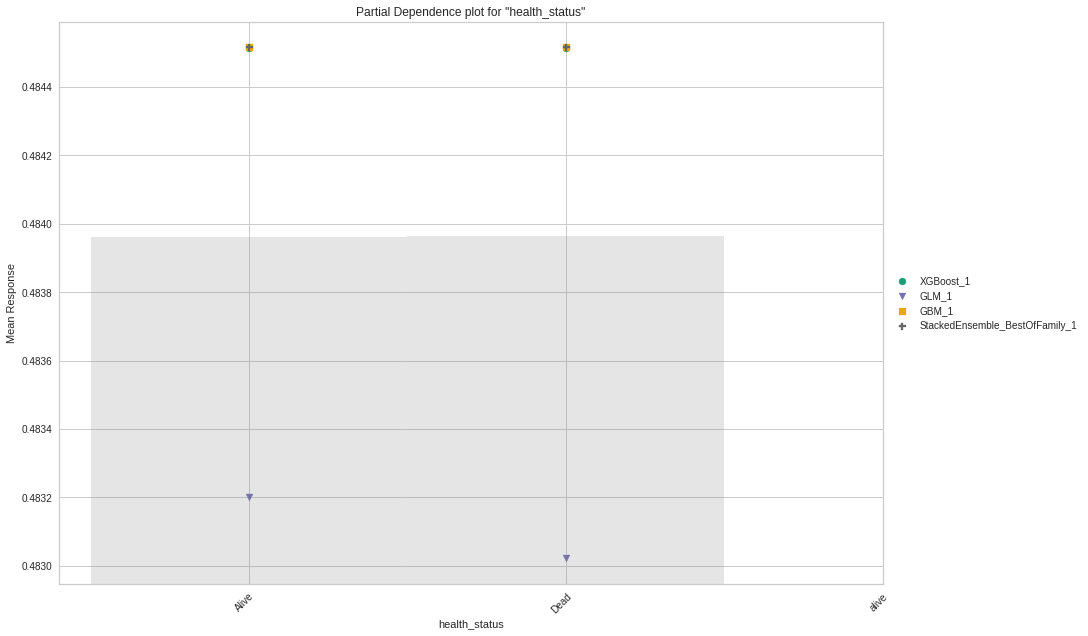

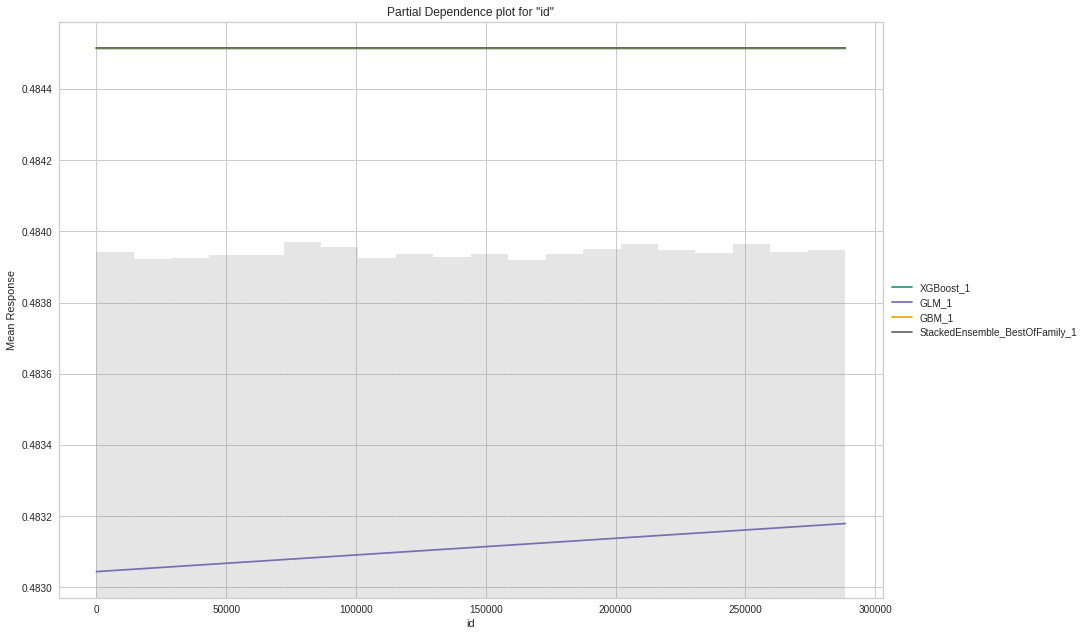

In [58]:
exa = aml.explain(df_test)

### Observations
1. Variable Importance plot - As we have seen in earlier two models, In autoML model also we have Diarrhoea as the most important feature
2. Variable Importance plot - The next important features are Malaria, Ebola, Measles, Confirmed and Yellow_Fever and so on
3. SHAP Summary - In Shap summary also we can see that the features such as Diarrohea, Age and Malaria to be some of the most important features for predicting the cholera disease
4. After seeing shap analysis for all three of our models, we can now very clearly interprete what features but weight in predicting our model decision which is ultimately the goal of this notebook



# Conclusion 

For this dataset the best model according to AutoML is xgboost. When a classifier like Decision Tree was implemented on this dataset it gave a better accuracy. The accuracy on testing data was 88.09 percent. On the other hand when Linear Regression was implemented the accuracy for training data was 79.8 percent. After implementing these model I calculated SHAP values using SHAP analysis method. I plotted different plots like permutation plots, waterfall plot, feature importance bar chart and many more plots.

For each model, the important feature obtained were different. Among all these 3 models the best accuracy was obtained for Decision Tree model.The important features for this model were Diarrhoea. This means that for this model the target variable 'Cholera' is highly depended on Diarrohea, Measles, Ebola and Yellow_Fever.



# Citations

1.Many techniques used in this notebook have been adopted from the following github repositories

* Owner - AI Skunkworks
* Link - https://github.com/aiskunks/Skunks_Skool
<br></br>
* Author name - Prof Nik Bear Brown
* Link - https://github.com/nikbearbrown/

2.The methods and parameters of the models amd code corrections have been adapted from stackoverflow

* Link - https://stackoverflow.com

3.Reference has been taken from the seaborn webpage for charts and visualization
* Link - https://seaborn.pydata.org

4.The methods and parameters of the GLM model have been adapted from the h2o documentation</br>
* Author - **H2O.ai**
* Link - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html</br>

# Licensing

Copyright 2023 Shweta Chandraprakash Bulchandani

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.